## `KMeans Pour les Nuls - Loïc et Bertrand`

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

### `A quoi ça sert ?`

Qu’est ce que le clustering ?
Le __clustering__ est une méthode d’apprentissage __non supervisé__ (unsupervised learning). Ainsi, on n’essaie pas d’apprendre une relation de corrélation entre un ensemble de features X d’une observation et une valeur à prédire Y, comme c’est le cas pour l’apprentissage supervisé. L’apprentissage non supervisé va plutôt trouver des patterns dans les données. Notamment, en regroupant les choses qui se ressemblent.

En apprentissage non supervisé, les données sont représentées comme suit :

Chaque ligne représente un individu (une observation). A l’issue de l’application du clustering, on retrouvera ces données regroupées par ressemblance. Le clustering va regrouper en plusieurs familles (clusters) les individus/objets en fonction de leurs caractéristiques. Ainsi, les individus se trouvant dans un même cluster sont similaires et les données se trouvant dans un autre cluster ne le sont pas.

![matrice](img/matrice.PNG)

Il existe deux types de clustering :

Le clustering hiérarchique
Le clustering non-hiérarchique (partitionnement)

### `K-MEANS c'est quoi donc`

K-means est un algorithme __non supervisé__ de clustering __non hiérarchique__. Il permet de regrouper en K clusters distincts les observations du data set. Ainsi les données similaires se retrouveront dans un même cluster. Par ailleurs, une observation ne peut se retrouver que dans un cluster à la fois (exclusivité d’appartenance). Une même observation, ne pourra donc, appartenir à deux clusters différents.

### `Comment ça fonctionne ? Un guide pas à pas !`

Entrée : 

K le nombre de cluster à former
Le Training Set (matrice de données)
DEBUT

Choisir aléatoirement K points (une ligne de la matrice de données). Ces points sont les centres des clusters (nommés centroïds).
  
                        REPETER

                            Affecter chaque point (élément de la matrice de donnée) au groupe dont il est le plus proche au son centre

                            Recalculer le centre de chaque cluster  et modifier le centroide

                        JUSQU‘A CONVERGENCE

                        OU    (stabilisation de l’inertie totale de la population)

FIN ALGORITHME

Algorithme plus en détails ici en python pur :  [kmeans_presentation_algo](kmeans_presentation_algo.ipynb)

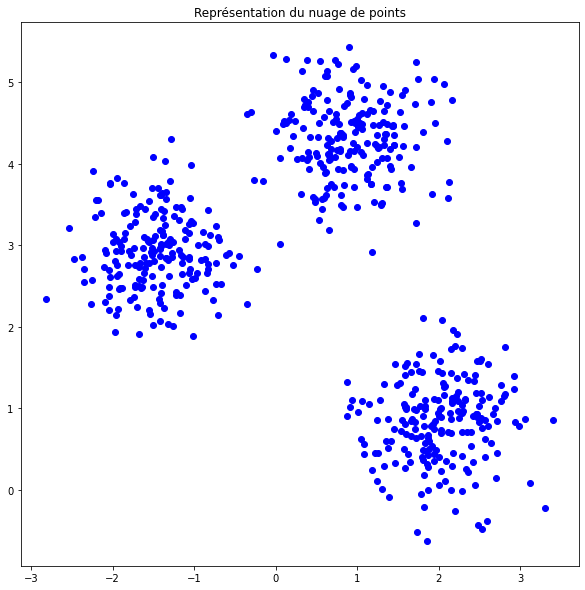

In [21]:
# Génération de 4 cluster
X, y = make_blobs(n_samples=600, centers=3, n_features=2, random_state=0, cluster_std=0.5)

# Représentatio du nuage de points
plt.figure(figsize=(10,10))
plt.title("Représentation du nuage de points")
plt.scatter(X[:,0],X[:,1],c='b')
##plt.plot(-2,2.5, 'o', ms=20 * 4, mec='red', mfc='none', mew=2)
#plt.plot(1,5, 'o', ms=20 * 4, mec='red', mfc='none', mew=2)
#plt.plot(2.1,0.1, 'o', ms=20 * 4, mec='red', mfc='none', mew=2)
plt.show()

Cet algorithme cherche à minimiser la variance des clusters

In [24]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

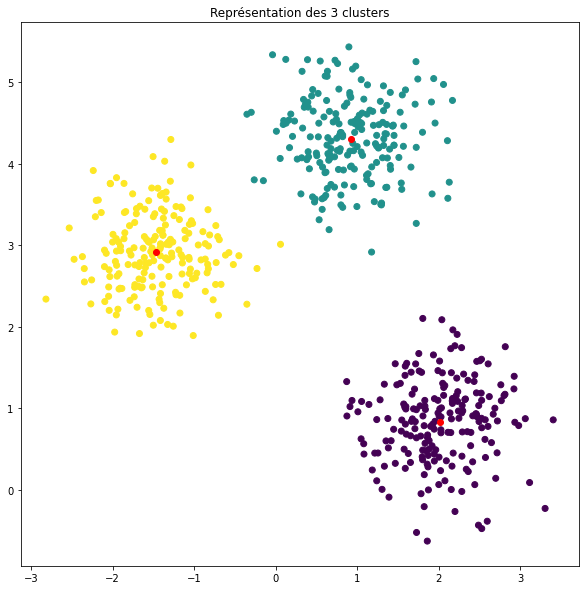

In [32]:
plt.figure(figsize=(10,10))
plt.title("Représentation des 3 clusters")
plt.scatter(X[:,0],X[:,1],c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c='r')
plt.show()

Dans l'exemple précédent, on a cherché k=3 clusters arbitrairement, comment définir un K optimal

Choisir un nombre de cluster K n’est pas forcément intuitif. Spécialement quand le jeu de données est grand et qu’on n’ait pas un a priori ou des hypothèses sur les données. Un nombre K grand peut conduire à un partitionnement trop fragmenté des données. Ce qui empêchera de découvrir des patterns intéressants dans les données. Par contre, un nombre de clusters trop petit, conduira à avoir, potentiellement, des cluster trop généralistes contenant beaucoup de données. Dans ce cas, on n’aura pas de patterns “fins” à découvrir.

Pour un même jeu de données, il n’existe pas un unique clustering possible. La difficulté résidera donc à choisir un nombre de cluster K qui permettra de mettre en lumière des patterns intéressants entre les données. Malheureusement il n’existe pas de procédé automatisé pour trouver le bon nombre de clusters.

La méthode la plus usuelle pour choisir le nombre de clusters est de lancer K-Means avec différentes valeurs de K et de calculer la variance des différents clusters.  La variance est la somme des distances entre chaque centroid d’un cluster et les différentes observations inclues dans le même cluster. Ainsi, on cherche à trouver un nombre de clusters K de telle sorte que les clusters retenus minimisent la distance entre leurs centres (centroids) et les observations dans le même cluster. On parle de minimisation de la distance intra-classe.

La variance des clusters se calcule comme suit :

![varianve](img/variance.PNG)

Avec :
c_j : Le centre du cluster (le centroïd)
x_i : la ième observation dans le cluster ayant pour centroïd c_j
D(c_j, x_i) : La distance (euclidienne ou autre) entre le centre du cluster et le point.

### ` Trouver le meilleur K`

In [26]:
k=10 # Nombre de clusters
variance=[]
for nbk in range (1,k) :
    kmeans=KMeans(n_clusters=nbk)
    kmeans.fit(X)
    pred = kmeans.predict(X)
    variance.append(kmeans.inertia_)

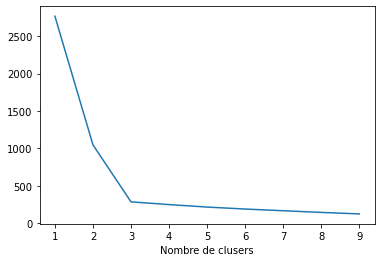

In [31]:
plt.plot(list(range(1,k)), variance)
plt.xlabel('Nombre de clusers')
plt.show()

On remarque sur ce graphique, la forme d’un bras où le point le plus haut représente l’épaule et le point où K vaut 9 représente l’autre extrémité : la main. Le nombre optimal de clusters est le point représentant le coude. Ici le coude peut être représenté par K valant 3. C’est le nombre optimal de clusters. Généralement, le point du coude est celui du nombre de clusters à partir duquel la variance ne se réduit plus significativement. En effet, la “chute” de la courbe de variance (distortion) entre 1 et 3 clusters est significativement plus grande que celle entre 4 clusters et 8 clusters.

Le fait de chercher le point représentant le coude, a donné nom à cette méthode : La méthode Elbow (coude en anglais).

Finalement, le choix (au vu de ce graphique), ce fait pour 3 clusters.

### `Cas d’utilisation K-means`

K-Means en particulier et les algorithmes de clustering de façon générale ont tous un objectif commun : Regrouper des éléments similaires dans des clusters.  Ces éléments peuvent être tous et n’importe quoi, du moment qu’ils sont encodés dans une matrice de données.

Les champs d’application de K-Means sont nombreux, il est notamment utilisé en :

la segmentation de la clientèle en fonction d’un certain critère (démographique, habitude d’achat etc….)
Utilisation du clustering en Data Mining lors de l’exploration de données pour déceler des individus similaires. Généralement, une fois ces populations détectées, d’autres techniques peuvent être employées en fonction du besoin.
Clustering de documents (regroupement de documents en fonction de leurs contenus. Pensez à comment Google Actualités regroupe des documents par thématiques.)

Cas d'utilisation pour l'iris dataset :  [iris_case_Loic_Bertrand](iris_case_Loic_Bertrand.ipynb)

### `Remarques sur le K-Means`

Optimums locaux

En analysant la façon de procéder de l’algorithme de K-means, on remarque que pour un même jeu de données, on peut avoir des partitionnements différents. En effet, L’initialisation des tous premiers K centroids est complétement aléatoire. Par conséquent l’algorithme trouvera des clusters différents en fonction de cette première initialisation aléatoire. De ce fait, la configuration des clusters trouvés par K-Means peut ne pas être la plus optimale. On parle d’optimum local.

Afin de palier aux problèmes des optimums locaux, il suffit de lancer K-means plusieurs fois sur le jeu de données (avec le même nombre K de clusters et des initialisations initiales des centroids différentes) et voir la composition des clusters qui se forment. Par la suite, garder celui qui convient à votre besoin.